In [55]:
using Plots
using Transducers
using LaTeXStrings
import Statistics
import Distributions

## Битовый график

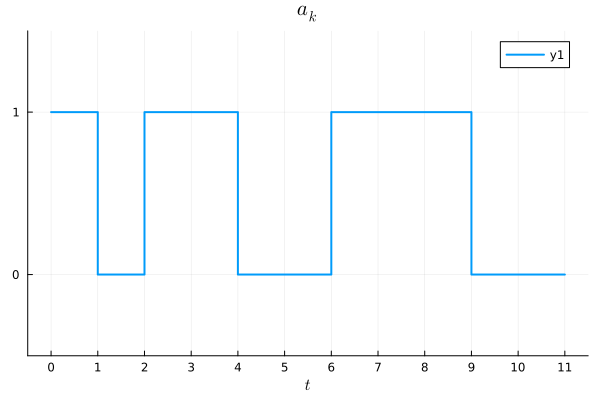

In [2]:
bits = [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0]

plot_bit_stream = plot(0:length(bits)-1, bits,
    linewidth=2, 
    line=:steppost, 
    xlabel=L"$t$", 
    title=L"$a_k$", 
    xlims=(-0.5, length(bits)-0.5), 
    ylims=(-0.5, 1.5), 
    xticks=0:length(bits)+1, 
    yticks=0:1,
)

## Значения для синусоид

In [3]:
phase_idx = bits |>
  Scan(0) do last, bit 
    last ⊻ bit
  end |> collect

12-element Vector{Int64}:
 1
 1
 0
 1
 1
 1
 0
 1
 0
 0
 0
 0

## Синусоидальный график

In [4]:
message_len = length(bits)
samples_per_bit = 50
bit_duration = 1

t = range(0, stop=bit_duration, length=samples_per_bit)
phase_0 = sin.(3π * t)
phase_1 = -phase_0
phases = [phase_0, phase_1]

2-element Vector{Vector{Float64}}:
 [0.0, 0.1911586287013723, 0.3752670048793741, 0.5455349012105487, 0.6956825506034864, 0.8201722545969559, 0.9144126230158125, 0.9749279121818236, 0.9994862162006879, 0.9871817834144502  …  0.9871817834144501, 0.9994862162006879, 0.9749279121818237, 0.9144126230158129, 0.820172254596956, 0.695682550603487, 0.5455349012105485, 0.3752670048793747, 0.1911586287013719, 3.6739403974420594e-16]
 [-0.0, -0.1911586287013723, -0.3752670048793741, -0.5455349012105487, -0.6956825506034864, -0.8201722545969559, -0.9144126230158125, -0.9749279121818236, -0.9994862162006879, -0.9871817834144502  …  -0.9871817834144501, -0.9994862162006879, -0.9749279121818237, -0.9144126230158129, -0.820172254596956, -0.695682550603487, -0.5455349012105485, -0.3752670048793747, -0.1911586287013719, -3.6739403974420594e-16]

In [5]:
signal = phase_idx |> 
  Map() do phase_idx 
    phases[phase_idx + 1]
  end |>
  foldxl(vcat)

600-element Vector{Float64}:
 -0.0
 -0.1911586287013723
 -0.3752670048793741
 -0.5455349012105487
 -0.6956825506034864
 -0.8201722545969559
 -0.9144126230158125
 -0.9749279121818236
 -0.9994862162006879
 -0.9871817834144502
  ⋮
  0.9994862162006879
  0.9749279121818237
  0.9144126230158129
  0.820172254596956
  0.695682550603487
  0.5455349012105485
  0.3752670048793747
  0.1911586287013719
  3.6739403974420594e-16

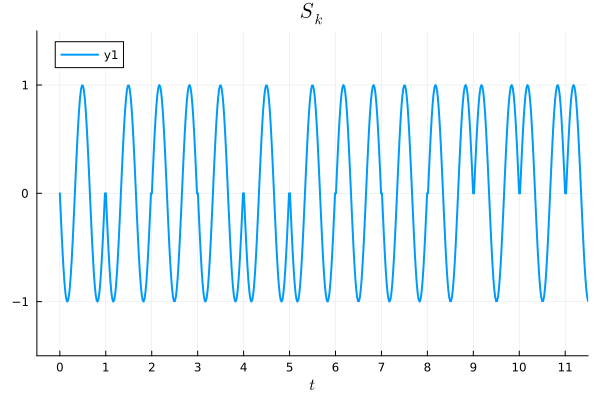

In [6]:
t = range(0, stop=bit_duration * message_len, length=samples_per_bit * message_len)
plot_signal = plot(
    t, signal, 
    linewidth=2, 
    xlabel=L"$t$", 
    title=L"$S_k$", 
    xlims=(-0.5, length(bits)-0.5), 
    ylims=(-1.5, 1.5), 
    xticks=0:length(bits)+1, 
    yticks=-1:1,
)

## Битовый + синусоидальный графики

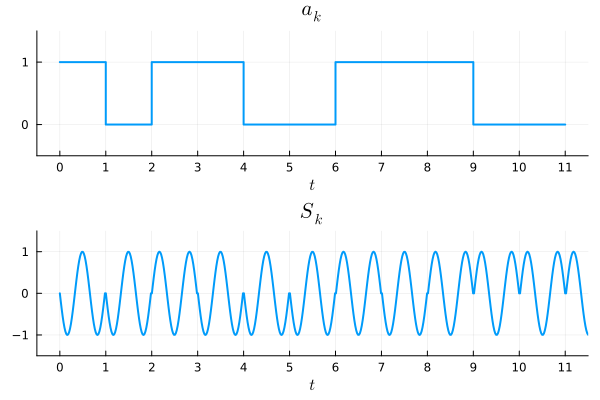

In [7]:
res = plot(plot_bit_stream, plot_signal, layout=(2,1), legend=false)
# savefig(res, "../report/pics/bitsin.svg")


# Приемник

## Часть 1

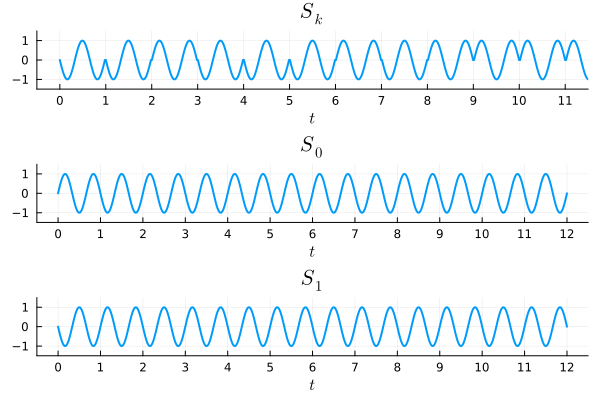

In [8]:
t = range(0, stop=bit_duration * message_len, length=samples_per_bit * message_len)
signal_0 = sin.(3π * t)
signal_1 = -signal_0

plot_reference_0 = plot(
     t, signal_0, 
     linewidth=2, 
     xlabel=L"$t$", 
     title=L"$S_0$", 
     xlims=(-0.5, length(bits)+0.5), 
     ylims=(-1.5, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1,
)
plot_reference_1 = plot(
     t, signal_1, 
     linewidth=2, 
     xlabel=L"$t$", 
     title=L"$S_1$", 
     xlims=(-0.5, length(bits)+0.5), 
     ylims=(-1.5, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1,
)

plot_references = plot(plot_signal, plot_reference_0, plot_reference_1, layout=(3,1), legend=false)
# savefig(res2, "../report/pics/rx1.svg")



## Часть 2

In [9]:
signal_mult_0 = signal .* signal_0
signal_mult_1 = signal .* signal_1

600-element Vector{Float64}:
 0.0
 0.035878642376054516
 0.13836456633296432
 0.2927469271029484
 0.47686544242738016
 0.6642909924286516
 0.8281189131451329
 0.9448305435147686
 0.9976687893770122
 0.9790432197644102
 ⋮
 0.9976687893770122
 0.9448305435147705
 0.8281189131451339
 0.664290992428656
 0.47686544242738177
 0.2927469271029529
 0.1383645663329657
 0.0358786423760565
 1.6197405652748063e-30

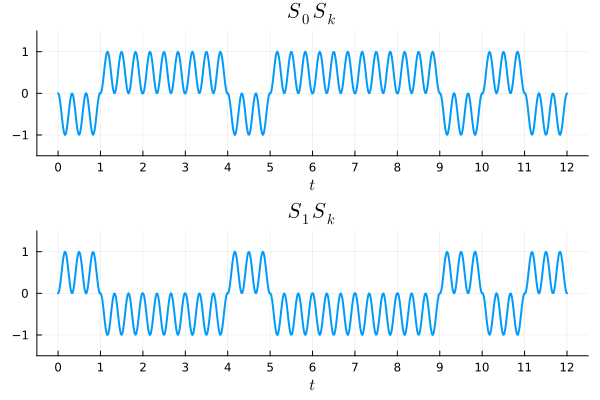

In [10]:
plot_mult_0 = plot(
     t, signal_mult_0, 
     linewidth=2, 
     xlabel=L"$t$", 
     title=L"$S_0\,S_k$", 
     xlims=(-0.5, length(bits)+0.5), 
     ylims=(-1.5, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1,
)
plot_mult_1 = plot(
     t, signal_mult_1, 
     linewidth=2, 
     xlabel=L"$t$", 
     title=L"$S_1\,S_k$", 
     xlims=(-0.5, length(bits)+0.5), 
     ylims=(-1.5, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1,
)

plot_mult = plot(plot_mult_0, plot_mult_1, layout=(2,1), legend=false)

In [41]:
signal_int_0 = signal_mult_0 |> 
  Partition(samples_per_bit) |>
  Map() do chunk
    (chunk |> Scan(+) |> collect) ./ (0.5 * samples_per_bit)
  end |> foldxl(vcat)

signal_int_1 = signal_mult_1 |> 
  Partition(samples_per_bit) |>
  Map() do chunk
    (chunk |> Scan(+) |> collect) ./ (0.5 * samples_per_bit)
  end |> foldxl(vcat)

600-element Vector{Float64}:
 0.0
 0.0014351456950421806
 0.006969728348360753
 0.01867960543247869
 0.0377542231295739
 0.06432586282671997
 0.09745061935252528
 0.13524384109311602
 0.1751505926681965
 0.21431232145877288
 ⋮
 0.8487965460124651
 0.8865897677530559
 0.9197145242788612
 0.9462861639760075
 0.9653607816731028
 0.977070658757221
 0.9826052414105396
 0.9840403871055818
 0.9840403871055818

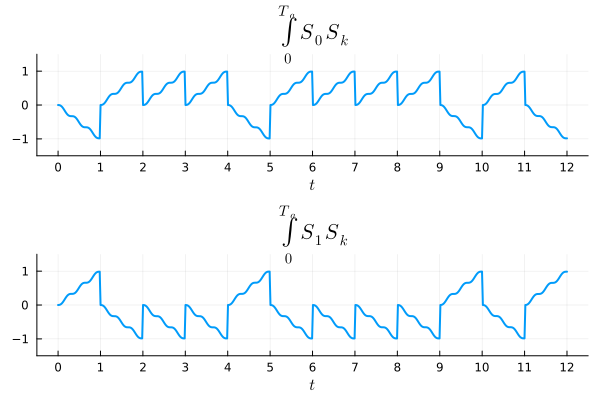

In [43]:
plot_int_0 = plot(
     t, signal_int_0, 
     linewidth=2, 
     xlabel=L"$t$", 
     title=L"$\int_0^{T_{a}} S_0\,S_k$", 
     xlims=(-0.5, length(bits)+0.5), 
     ylims=(-1.5, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1,
)

plot_int_1 = plot(
     t, signal_int_1, 
     linewidth=2, 
     xlabel=L"$t$", 
     title=L"$\int_0^{T_{a}} S_1\,S_k$", 
     xlims=(-0.5, length(bits)+0.5), 
     ylims=(-1.5, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1,
)

plot_int = plot(plot_int_0, plot_int_1, layout=(2,1), legend=false)

In [46]:
signal_max = (signal_int_0 .< signal_int_1) |>
  Partition(samples_per_bit) |>
  Map(maximum) |>
  collect

12-element Vector{Bool}:
 1
 0
 0
 0
 1
 0
 0
 0
 0
 1
 0
 1

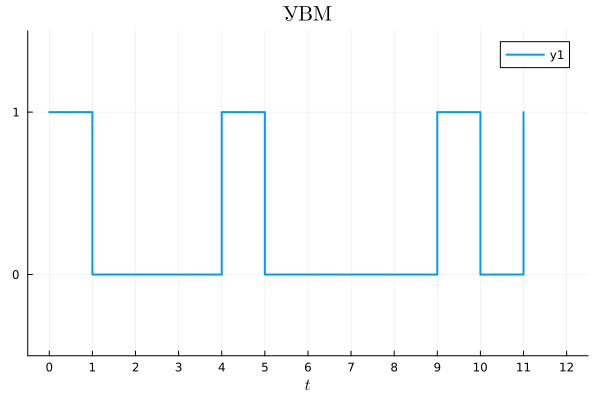

attempt to save state beyond implementation limit


In [50]:
plot_max = plot(
    0:11, signal_max, 
    linewidth=2, 
    line=:steppost, 
    xlabel=L"$t$", 
    title=L"УВМ", 
    xlims=(-0.5, length(bits)+0.5), 
    ylims=(-0.5, 1.5), 
    xticks=0:length(bits)+1, 
    yticks=0:1,
)

In [51]:
signal_self_xor = [signal_max; 0] .== [0; signal_max]

13-element BitVector:
 0
 0
 1
 1
 0
 0
 1
 1
 1
 0
 0
 0
 0

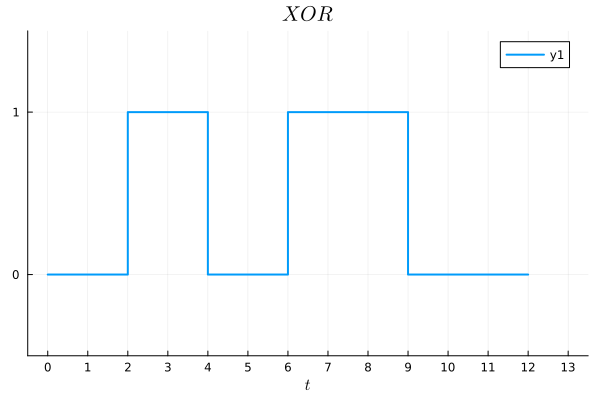

In [52]:
plot_xor = plot(
    0:12, signal_self_xor, 
    linewidth=2, 
    line=:steppost, 
    xlabel=L"$t$", 
    title=L"XOR", 
    xlims=(-0.5, length(bits)+1.5), 
    ylims=(-0.5, 1.5), 
    xticks=0:length(bits)+2, 
    yticks=0:1,
)

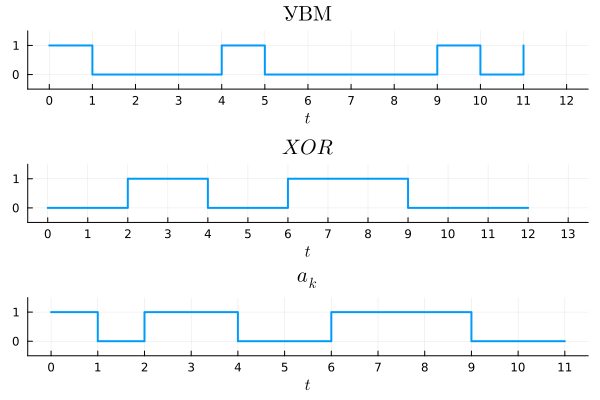

In [53]:
plot_decode = plot(plot_max, plot_xor, plot_bit_stream, layout=(3,1), legend=false)
# savefig(rx45, "../report/pics/rx45.svg")

## Вероятности ошибки

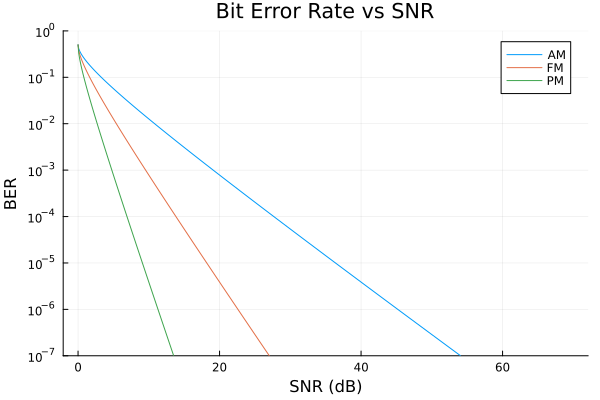

In [60]:
dist = Distributions.Normal()

ber_am(snr_db) = Distributions.ccdf(dist, sqrt(snr_db / 2))
ber_fm(snr_db) = Distributions.ccdf(dist, sqrt(snr_db))
ber_pm(snr_db) = Distributions.ccdf(dist, sqrt(2 * snr_db))

snr_db_range = 0:0.1:70

desired_ber_range = 1e-6:1e-7:1e-4

snr_am = ber_am.(desired_ber_range)
snr_fm = ber_fm.(desired_ber_range)
snr_pm = ber_pm.(desired_ber_range)

plot(snr_db_range, ber_am.(snr_db_range), label="AM", xlabel="SNR (dB)", ylabel="BER",
     title="Bit Error Rate vs SNR", yscale=:log10, legend=:topright, ylims=(1e-7, 1))
plot!(snr_db_range, ber_fm.(snr_db_range), label="FM", ylims=(1e-7, 1))
plot!(snr_db_range, ber_pm.(snr_db_range), label="PM", ylims=(1e-7, 1))

# savefig("../report/pics/errate.svg")


